# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge of testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey-Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

Import `passengers.csv` and view the head.

In [3]:
# Read the dataset 'passengers.csv' and view the head
data = pd.read_csv('passengers.csv')
data.head()

# Month	#Passengers
# 0	1949-01-01	112
# 1	1949-02-01	118
# 2	1949-03-01	132
# 3	1949-04-01	129
# 4	1949-05-01	121

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [6]:
# Set month column as a timeseries object, and make it the index
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m-%d')
data.set_index('Month', inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [7]:
# check the head and the new index
print(data.head())
print(data.index)

# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)


Now that we have successfully created a TS object, we can use the `plot()` function in pandas to visually inspect this time-series.

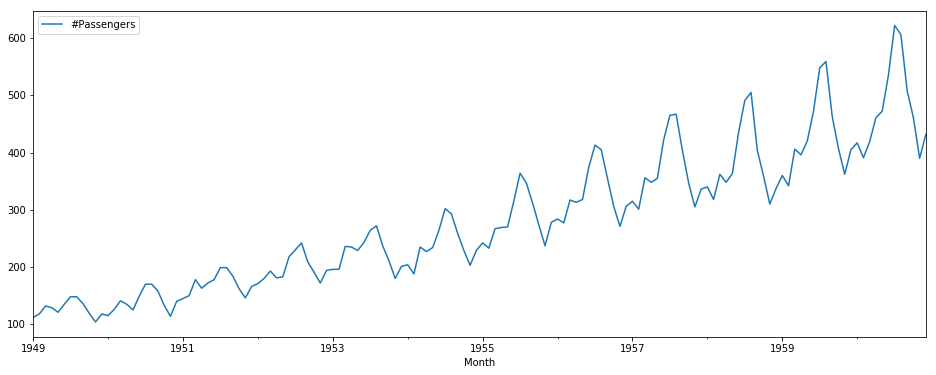

In [9]:
# Plot the time series data 
data.plot(figsize=(16,6));

We can see that that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and the 
**Dickey-Fuller Test**.

## Rolling Statistics 

Use the `.rolling()` function to find the rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [10]:
#Determine rolling statistics
rollmean = data.rolling(window=12, center=False).mean()
rollstd = data.rolling(window=12, center=False).std()

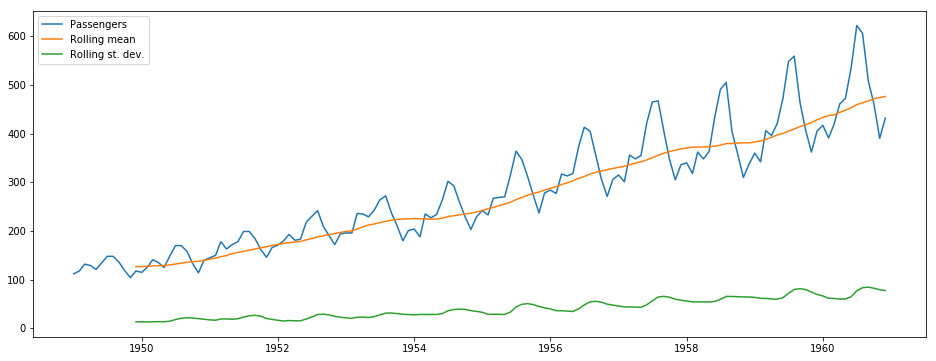

In [13]:
#Plot rolling statistics
plt.figure(figsize=(16,6))
plt.plot(data.index, data, label='Passengers')
plt.plot(data.index, rollmean, label='Rolling mean')
plt.plot(data.index, rollstd, label='Rolling st. dev.')
plt.legend();

Though the variation in standard deviation is small, the mean is increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [15]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
test = adfuller(data['#Passengers'])
output = pd.Series(test[0:4], index=['Test stat.', 'p-value', '# Lags used',
                                    '# obs used'])

# Extract and display test results in a user friendly manner
for key, value in test[4].items():
    output['Crit. value (%s)'%key] = value
    
print(output)
# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

Test stat.             0.815369
p-value                0.991880
# Lags used           13.000000
# obs used           130.000000
Crit. value (1%)      -3.481682
Crit. value (5%)      -2.884042
Crit. value (10%)     -2.578770
dtype: float64


## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

In [16]:
# Load the data
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Month             72 non-null object
monthly_return    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [17]:
# Preview data to see date format
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [18]:
# Convert Month to datetime, set as index
nyse.Month = pd.to_datetime(nyse.Month, format='%Y-%m')
nyse.set_index('Month', inplace=True)
nyse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1961-01-01 to 1966-12-01
Data columns (total 1 columns):
monthly_return    72 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


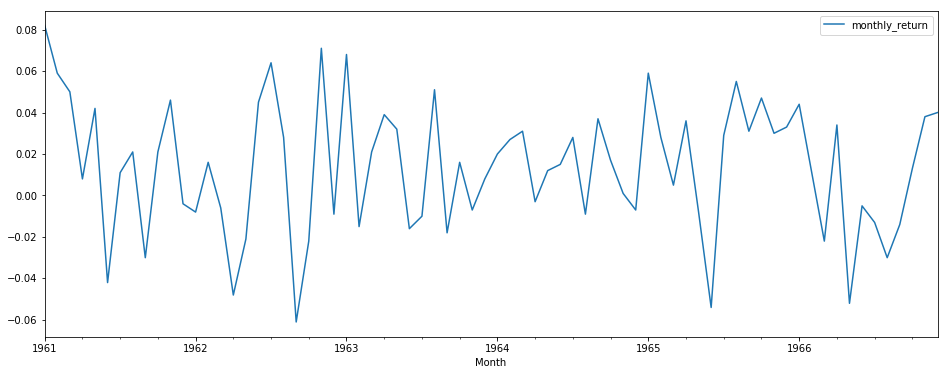

In [19]:
# Plot data
nyse.plot(figsize=(16,6));

In [20]:
# Calculate rolling mean and std
rollmean = nyse.rolling(window=12, center=False).mean()
rollstd = nyse.rolling(window=12, center=False).std()

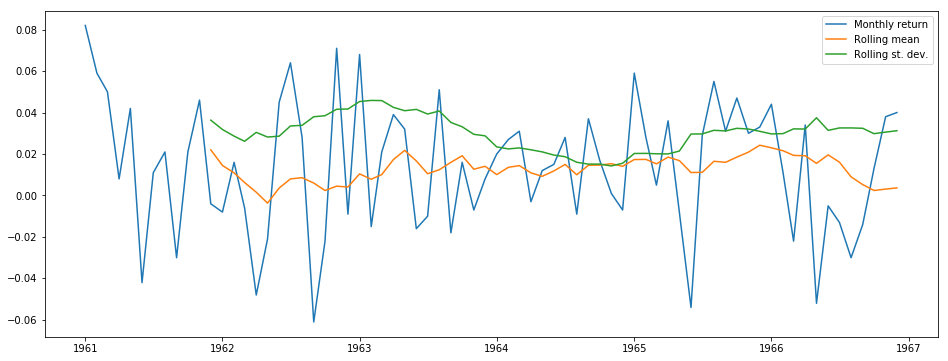

In [21]:
# Plot data with rolling stats
plt.figure(figsize=(16,6))
plt.plot(nyse.index, nyse.monthly_return, label='Monthly return')
plt.plot(nyse.index, rollmean, label='Rolling mean')
plt.plot(nyse.index, rollstd, label='Rolling st. dev.')
plt.legend();

In [22]:
# Use Dickey-Fuller test to determine stationarity
test = adfuller(nyse.monthly_return)
output = pd.Series(test[0:4], index=['Test stat.', 'p-value', '# Lags used',
                                    '# obs used'])
for key, value in test[4].items():
    output['Crit. value (%s)'%key] = value

print(output)

Test stat.          -7.895375e+00
p-value              4.325126e-12
# Lags used          0.000000e+00
# obs used           7.100000e+01
Crit. value (1%)    -3.526005e+00
Crit. value (5%)    -2.903200e+00
Crit. value (10%)   -2.588995e+00
dtype: float64


This time series is stationary.

## Summary

In this lab, you learned to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!